# Trueskill

How does trueskill converge over the finals?

In [1]:
from viz import load_all_games
from viz import score_with_default_trueskill 
from viz import plot_players 

import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline  

In [2]:
games = load_all_games() # Takes a minute

In [3]:
players = score_with_default_trueskill(games) # Takes a few minutes

Loading Games
5000 of 74080
10000 of 74080
15000 of 74080
20000 of 74080
25000 of 74080
30000 of 74080
35000 of 74080
40000 of 74080
45000 of 74080
50000 of 74080
55000 of 74080
60000 of 74080
65000 of 74080
70000 of 74080
Done


In [4]:
players["mzotkiew"].rating_data[-1]

PlayerData(timestamp=u'2017-02-16 04:51:19', game_number=311, mu=54.088555334996265, sigma=0.7347539882923072)

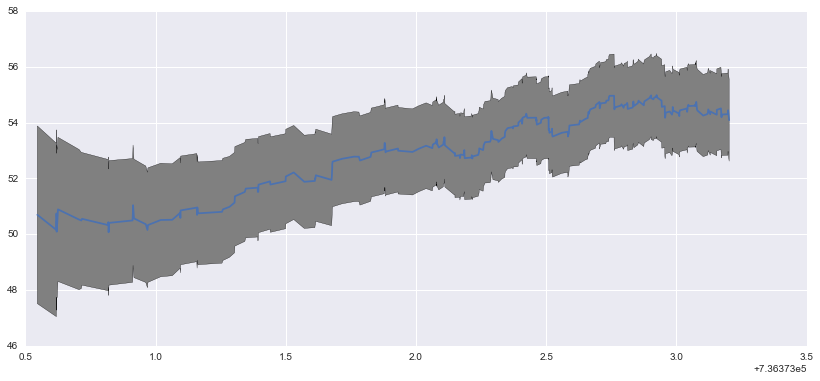

In [23]:
def plot_converge(player):
    player_mus = []
    player_sigmas = []
    player_dates = []
    for r_data in player.rating_data[20:]:
        player_mus.append(r_data.mu)
        player_sigmas.append(r_data.sigma)
        player_dates.append(datetime.datetime.strptime(r_data.timestamp,'%Y-%m-%d %H:%M:%S'))

    player_mus = np.array(player_mus)
    player_sigmas = np.array(player_sigmas)
    dates = matplotlib.dates.date2num(player_dates)

    sns.set_style("darkgrid")
    plt.rcParams["figure.figsize"] = [14.0, 6.0]
    plt.fill_between(dates, player_mus+player_sigmas*2, player_mus-player_sigmas*2, facecolor='grey')
    plt.plot(dates, player_mus)
    plt.show()
    
plot_converge(players["mzotkiew"])

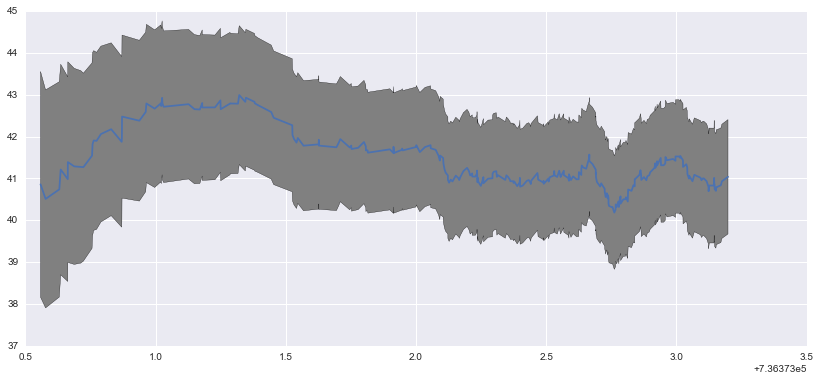

In [21]:
plot_converge(players["DanielVF"])

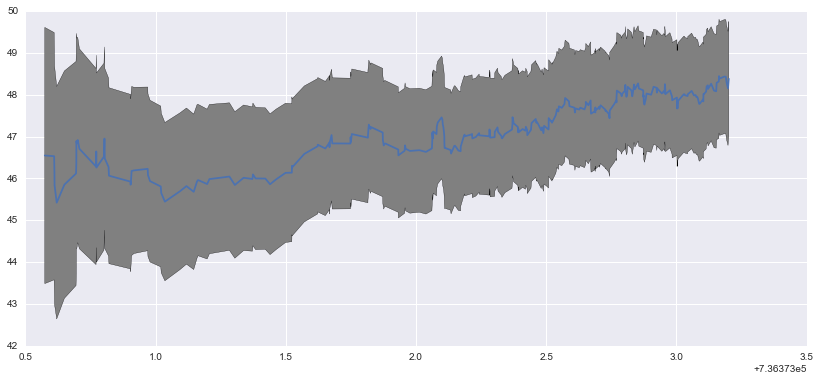

In [24]:
plot_converge(players["nmalaguti"])